<br>
 <img src="https://github.com/cms-opendata-education/cms-jupyter-materials-finnish/blob/master/Kuvat/CMSlogo_color_label_1024_May2014.png?raw=true"  align="right" width="100px" title="CMS projektin oma logo">                   
 <img src="https://github.com/cms-opendata-education/cms-jupyter-materials-finnish/blob/master/Kuvat/aaltojunior_logo.PNG?raw=true"  align="right" width="150px" title="CMS projektin oma logo">
 <br>
 

# Hiukkaset hukassa 
     Aalto-yliopisto Junior x CMS open data
Tervetuloa kiehtovan ja kummallisen hiukkasfysiikan pariin. 

Sisältö:

1. [Koodin alustus](#alustus)
2. [Tutoriaali Pandas DataFrameihin](#tut)
3. [Tehtävän alustus](#teht)
    - [Invariantti massa](#inv)
    - [Histogrammit](#demo1)
4. [Datan kimppuun](#handson)
5. [Tulosten vertailu](#wrapup)
6. [Lähteet](#sources)


****

# Ihan aluksi...

Tämä tiedosto on oppilaan versio, joka sisältää tehtäviä ja demoja CMS:n avoimen datan parissa. Vastatkaa kaikkiin $\color{blue}{\text{kysymyksiin}}$ ja pitäkää hauskaa datan kanssa! 

Tiedoston muoto on **Jupyter notebook**, joka yhdistää tekstiä ja **Python**-ohjelmointikielellä kirjoitettua koodia. Pythonille tyypillistä on, että käytetään paljon valmiiksi kirjoitettuja **kirjastopaketteja**. Näin käyttäjän ei tarvitse itse keksiä, miten jokin matemaattinen operaatio suoritetaan tai kuinka tietynlaista dataa käsitellään.

Jupyter-notebookeissa koodi ja tekstisisältö on jaoteltu lohkoittain. Lohkoja on mahdollista ajaa askel kerrallaan järjestyksessä painamalla näppäimiä $\color{red}{\text{ [shift] + [enter]}}$ 

Muista edetä järjestyksessä, koska osa koodista voi olla riippuvaista koodista joka on kirjoitettu aiempaan lohkoon!



<a id="alustus"></a>
### Koodin alustus
Alla on koodisolu joka ajettaessa hakee tarvittavat Python-paketit. (Linkkien takana lisätietoa/dokumentaatiota kyseisistä kirjastoista joka ei ole pakollista.)

- [Pandas](https://pandas.pydata.org/docs/user_guide/10min.html) on data-analyysiä varten
- [numpy](https://numpy.org/learn/) on hyödyllinen tieteellistä laskentaa varten
- [matplotlib.pyplot](https://matplotlib.org/stable/tutorials/index) mahdollistaa kuvaajien piirtämisen

Määritetään näille myös lyhyemmät nimet (pd, np ja plt), jotta myöhemmin niitä käytettäessä ei tarvitse kirjoittaa koko paketin nimeä.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#lataa koodin ja sitten ajaa sen:
!curl -O https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Apufunktiot/hiukkasethukassa.ipynb
%run Apufunktiot/hiukkasethukassa.ipynb

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (77) error setting certificate verify locations:  CAfile: /tmp/build/80754af9/curl_split_recipe_1639143724026/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pla


****

### Tutoriaali: Taulukon (_Pandas DataFrame_) tutkiminen ja käyttäminen

Seuraava osio on lyhyt tutoriaali, vähän tutummilla suureilla, siihen miten Pandasia käytetään, kuinka pythonilla lasketaan käyttäen matemaattista kirjastoa, ja kuinka kuvaajia piirretään. Mikäli Python ja [Pandas dataframet](https://www.learnpython.org/en/Pandas_Basics) ovat jo tuttua kauraa, voi tämän osion ohittaa.

Lukekaa ohjeet ensin huolella ja ajakaa sitten solut järjestyksessä. Esimerkin numerot ovat todellisten koeasemien mittoja. [[7](#mitat)]

<a id="tut"></a>
 Hyödyllisiä Python-komentoja
    
    - .head() (esim. "tiedostonnimi.head()" ) tulostaa tiedoston 5 ensimmäistä riviä
    
    - .-operaattori (esim. "tiedostonnimi.sarakkeenotsikko" ) palauttaa taulukosta vastaavan sarakkeen arvot
    
    - print() tulostaa sulkujen sisällä olevan arvon
    
    - len() palauttaa sulkujen sisällä olevan listan/jonon/taulukon pituuden (length)
    
    - min() palauttaa sulkujen sisällä olevan datan pienimmän arvon
    
    - max() palauttaa datan suurimman arvon
    



In [4]:
# Määritellään taulukko jota tutkitaan ja otsikoidaan rivit ja sarakkeet
LHC_koeasemat=pd.DataFrame({'Nimi':['CMS', 'ATLAS', 'ALICE', 'LHCb'],
        'Paino':[14000, 7000, 10000, 5600], #tonneja
        'Pituus':[21, 46, 26, 21], #metrejä
        'Leveys':[15, 25, 16, 13], #metrejä
        'Korkeus':[15, 25, 16, 10]})  #metrejä
# luodaan taulukko ja tallennetaan se muuttujaan "LHC_koeasemat" 
# Taulukko sisältää LHC kiihdyttimen varrella olevien koeasemien tietoja [lähdee].

In [5]:
# HEAD-komennon käyttö:
LHC_koeasemat.head() #palauttaa taulukon 5 ensimmäistä riviä

,Nimi,Paino,Pituus,Leveys,Korkeus
0,CMS,14000,21,15,15
1,ATLAS,7000,46,25,25
2,ALICE,10000,26,16,16
3,LHCb,5600,21,13,10


In [6]:
# Valitaan sarake "Nimi" ja tulostetaan se
print(LHC_koeasemat.Nimi)

0      CMS
1    ATLAS
2    ALICE
3     LHCb
Name: Nimi, dtype: object


In [7]:
#lasketaan montako riviä taulukossa on ja tulostetaan vastaus
pituus=len(LHC_koeasemat)
print(pituus)

4


In [8]:
# LHC_koeasemat.Paino                 valitsee tutkittavaksi sarakkeen jossa on ilmaisimien painot
# max(LHC_koeasemat.Paino )         etsii painoista suurimman
# print(max(LHC_koeasemat.Paino))     tulostaa max() funktiolla saaadun suurimman massan.

suurin=max(LHC_koeasemat.Paino)
print(suurin)

#samaan tapaan:
pienin=min(LHC_koeasemat.Korkeus)
print(pienin)

14000
10


<br>
<br>


#### Laskuja Pythonilla
Python on monikäyttöinen ohjelmointikieli, jolla voidaan käsitellä suuria määriä dataa ja suorittaa teokkaasti laskutoimituksia. Aloitetaan harjoittelu peruslaskuista ja käytetään yllä esitettyä esimerkkiä hiukkasfysiikassa käytetyistä ilmaisimista. Käytetään taulukon dataa laskemaan hiukan avaruudellisia mittoja tutuilla kaavoilla. Esimerkkitaulukko on jo tallennettu tietokoneen muistiin.

Alussa latasimme _numpy_ kirjaston ja tallensimme sen nimellä _np_. Kirjasto sisältää valmiiksi määriteltyjä funktioita, jota helpottavat laskujen suorittamista. Esimerkiksi `np.sqrt(x)` vastaa $\sqrt x$. Lisäksi `(x)\**2` ja `np.square(x)` vastaavat molemmat $x^2$.

Yksinkertaisuuden vuoksi oletetaan, että kaikki listan hiukkasilmaisimet olisivat lieriöitä. Näin ei kuitenkaan todellisuudessa ole.

In [9]:
#muistellaan mitä taulukko näyttikään
LHC_koeasemat.head()

,Nimi,Paino,Pituus,Leveys,Korkeus
0,CMS,14000,21,15,15
1,ATLAS,7000,46,25,25
2,ALICE,10000,26,16,16
3,LHCb,5600,21,13,10


 <img src="https://github.com/cms-opendata-education/cms-jupyter-materials-finnish/blob/master/Kuvat/laskuharjoitus_lavistaja.PNG?raw=true"  align="right" width="400px" title="[Kuva 1]  Törmäyksestä syntyneiden kahden myonin invariantin massan jakauma vuosilta 2017 ja 2018. Jakaumasta erottaa selvästi niiden hiukkasten piikit jotka voivat hajota kahdeksi myoniksi.">

 
Koska teimme oletuksen, että jokainen ilmaisin on lieriö, voidaan helposti laskea 
- **tilavuudet V :**  $\pi (0.5 r)^2 \cdot l$  
- **tiheydet :** $\frac{m}{V}$.
- **lävistäjät x :** pythagoran lauseen avulla, $\sqrt{(r)^2+l^2}$

, missä **$r$** on lieriön pohjan lävistäjä eli ilmaisimen korkeus, **$l$** lieriön korkeus eli ilmaisimen pituus ja **$m$** ilmaisimen massa.

In [10]:
# tilavuuden laskeminen 
##  np.pi on piin likiarvo
##  kahdella tähdellä merkitään potenssia

tilavuus = np.pi * (LHC_koeasemat.Korkeus /2 )**2 * LHC_koeasemat.Pituus
print(tilavuus)

0     3711.006322
1    22580.197198
2     5227.610176
3     1649.336143
dtype: float64


In [11]:
#  tiheyden laskeminen

tiheys = LHC_koeasemat.Paino / tilavuus
print(tiheys)

0    3.772562
1    0.310006
2    1.912920
3    3.395305
dtype: float64


In [12]:
#  lävistäjän laskemine

lävistäjä= np.sqrt((LHC_koeasemat.Pituus)**2 + (LHC_koeasemat.Korkeus)**2)
print(lävistäjä)

0    25.806976
1    52.354560
2    30.528675
3    23.259407
dtype: float64


<a id="hist_tut"></a>
#### Histogrammi Pythonilla


Käytetään histogrammin piirtoon _matplotlib.pyplot_ pakettia jonka tallensimme alussa nimellä _plt_. Paketilla piirretään histogrammi helposti funktion `plt.hist()` avulla.

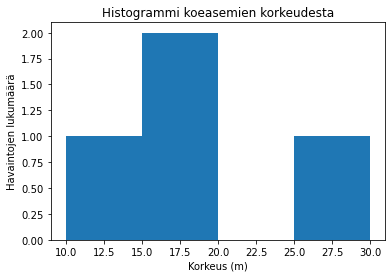

In [13]:
# Luodaan histogrammi
# plt.hist()ottaa argumenteiksi kolme arvoa:
### tiedoston nimi josta histogrammi piirretään
### bins kertoo moneenko pylvääseen havainnot jaetaan
### range määrittää alueen jolle histogrammi luodaan

plt.hist(LHC_koeasemat.Korkeus, bins=4, range=(10,30))  

# nimetään akselit
plt.xlabel("Korkeus (m)")
plt.ylabel("Havaintojen lukumäärä")

# annetaan kuvaajalle otsikko
plt.title("Histogrammi koeasemien korkeudesta")

# tulostetaan luotu kuvaaja
plt.show()

Pienillä datamäärillä histogrammi ei tuo lisäarvoa numeroiden tarkasteluun, eikä siitä ole hyötyä. Saattaa kuitenkin olla, että hiukkasfysiikan datamäärillä histogrammilla on mahdollista tuoda selvyyttä esimerkiksi _piikkidataan_...


****

<a id="teht"></a>
# Tehtävä

CERN:in kesäopiskelija on saanut tehtäväkseen tutkia CMS:n mittaamaa tutkimusdataa vuoden 2011 ajoilta. Dataan on valikoitu tapahtumia jossa hiukkasilmaisin on havainnut kaksi myonia. Aikaisempien tukimusten perusteella tiedetään että moni hiukkanen voi hajota juuri kahdeksi myoniksi ja ne voidaan tunnistaa invariantin massan avulla. Kiireinen kesäopiskelija on unohtanut pitää tärkeän mittausdatan järjestyksessä. Nyt hänellä on käsissään kuusi oudosti nimettyä tiedostoa CMS:n mittausdataa. Jokaisessa tiedostossa on mitattuja arvoja kahdesta myonista jotka ovat kenties peräisin jonkun hiukkasen hajoamisesta. Kesäopiskelija pyytää teidän apua tiedostojen sisällön tutkimisessa. 

Hypoteesi: Emohiukkasten massat voidaan selvittää invariantin massan arvojen avulla ja näin löytää hiukkaset jotka voivat hajota kahdeksi myoniksi.

****
<a id="inv"></a>
## Invariantti massa? KESKEN

Hiukkasfysiikan maailmassa tavallisen mekaniikan kaavat eivät enään aina päde kun massa muuttuu energiaksi ja toisin päin. Säilymislakeja toki kuitenkin on. Voimme muodostaa hiukkasten energian ja liikemäärän avulla suureen jota kutsumme **invariantiksi massaksi**. Sen arvo kuvaa hajonneelle emohiukkaselle ominaista massaa. 

On mahdoton ajatus punnita esimerkiksi Higgsin hiukkasta, jonka eliniänodote on luokkaa $10^{-22}$ sekunttia [[6](#higs)]. CMS:n kaltainen laite voi kuitenkin mitata tytärhiukkasten liikemäärää ja energiaa, joiden avulla voidaan laskea _invariantti massa_. Se on matemaattinen arvo joka on "invariantti" mittausympäristölle, eli se voidaan laskea missä ja mille tahansa. Jos sen laskee tietystä hajoamisesta syntyneille tytärhiukkasille, saadaan arvo joka on lähellä emohiukkasen massaa. Jos taas lasketaan invariantti massa hiukkasille jotka eivät liity mitenkään toisiinsa saadaan arvo joka ei kuvaa mitään, eli taustakohinaa.

**Invariantti massa siis säilyy hiukkasen hajotessa uusiksi hiukkasiksi.** Tämän ominaisuuden ansiosta se on voittamaton työkalu kokeellisen hiukkasfysiikan tutkijoille. Hiukkasilmaisin, kuten CMS, havaitsee lähinnä stabiileja hiukkasia. Määrittääkseen minkä raskaamman hiukkasen hajoamisesta stabiilit hiukkaset ovat kotoisin, tutkijoiden tulee tarkastella suuria määriä dataa. Piikit invariantin massan histogrammissa voivat viitata tietyn energiseen emohiukkaseen.
[Lisätietoa englanniksi](https://profmattstrassler.com/articles-and-posts/particle-physics-basics/mass-energy-matter-etc/mass-and-energy/)

<br>
 <img src="https://github.com/cms-opendata-education/cms-jupyter-materials-finnish/blob/master/Kuvat/inv_massa.PNG?raw=true"  align="left" width="600px" title="[Kuva 8]  Törmäyksestä syntyneiden kahden myonin invariantin massan jakauma vuosilta 2017 ja 2018. Jakaumasta erottaa selvästi niiden hiukkasten piikit jotka voivat hajota kahdeksi myoniksi.">
 <br>
 

****

<a id="demo1"></a>
## Histogrammit   KESKEN

((Joku pikakertaus histogrammeista))

**Histogrammit eri datamäärillä**

Kokeillaan, miten datan määrä vaikuttaa tuloksiin. Alla on koodi, joka piirtää annetulla datamäärällä (4 kertaa) histogrammin kahden suurienergisen myonin invariantista massasta. Aloitetaan tutkimalla pieniä lukuja 0-20 ja kasvatetaan datan määrää vähitellen. (esim. 5, 20, 300, 10000)

In [20]:
# Haetaan data tiedostosta ja tallennetaan se muuttujaan 'data'.
data = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Zmumu_Run2011A_massoilla.csv')

# Tallennetaan datatiedostossa olevat invarianttien massojen arvot muuttujaan 'invariantti_massa'.
invariantti_massa = data['M']

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)>

In [18]:
kuvat = 0
# Luodaan tyhjä lista 'valitut', johon tallennetaan valittujen invarianttien massojen arvot.
while kuvat < 4:
    valitut = []

# Pyydetään käyttäjää valitsemaan tapahtumien lukumäärä. Tallennetaan luku muuttujaan 'määrä'.
    määrä = int(input('Kuinka monta tapahtumaa valitaan: '))

# Tarkastetaan, onko datassa tarpeeksi tapahtumia. Jos tapahtumia ei ole tarpeeksi, tulostetaan virheilmoitus.
# Muussa tapauksessa massat valitaan ja tallennetaan 'valitut'-listaan.
    if määrä > len(invariantti_massa):
        print('Virhe: Histogrammin piirto epäonnistui. Ei tarpeeksi dataa. Maksimimäärä tapahtumia on ' + str(len(invariantti_massa)) + '.')
    else:
        for f in range(määrä):
            M = invariantti_massa[f]
            valitut.append(M)
        print('\n Valitsit datasta {} invariantin massan arvoa.'.format(määrä))

# Piirretään histogrammi valitusta datamäärästä. Valitaan pylväiden lukumäärä 'bins' sekä x-akselin väli 'range'.
    plt.hist(valitut, bins=120, range=(60,120))

# Name the axises and give the title.
    plt.xlabel('Invariantti massa [GeV]')
    plt.ylabel('Tapahtumien lukumäärä')
    plt.title('Kahden myonin invariantti massa\n')
    plt.show()
# Empty the variable "selected" for the next run.
    kuvat += 1
    valitut = []

Kuinka monta tapahtumaa valitaan:  skip


ValueError: invalid literal for int() with base 10: 'skip'

****
<a id="handson"></a>
# Datan kimppuun

"**\#**" merkkaa koodissa kommentin jota kone ei aja. Kommentit helpottavat koodin lukemista ja sen toiminnan ymmärtämistä.

Poistakaa alla olevasta koodista kommentin **\#**-merkki ryhmänne numeron mukaiselta riviltä ja ajakaa solu. Käsky `pd.read_csv()` lukee suluissa olevan csv-tiedoston ja tallentaa sen sisältämän datan taulukkona muuttujaan. Annetaan muuttujalle nimeksi _piikidata_ + _ryhmän numero_.


In [17]:
piikkidata1 = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/piikkidata1.csv')
#piikkidata2 = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/piikkidata2.csv')
#piikkidata3 = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/piikkidata3.csv')
#piikkidata4 = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/piikkidata4.csv')
#piikkidata5 = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/piikkidata5.csv')
#piikkidata6 = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/piikkidata6.csv')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)>

Edellisessä koodisolussa latasit tiedoston netistä, luit sen csv-muodosta ja tallensit muuttujaan. Mutta miten saamme tietää miltä lataamamme data näyttää? Tutkia ryhmänne piikkidataa ja lähtekää selvittämään vastaukset ensimmäisiin kysymyksiin.

Mikäli tenkkapoo iskee tässä vaiheessa, kannattaa vilkaista [tutoriaalia](#tut) taulukoiden käsittelystä (löytyy tiedoston alusta).


## Tutkikaa ladattua tiedostoa 
Seuraavaksi kirjoitetaan itse koodia.

Haetussa datassa on monta törmäystapahtumaa, joista jokaisesta on tallennettu useita arvoja. Lisäksi jokaisessa tapahtumassa syntyi 2 myonia jotenka dataan on tallennettu arvot molemmille myoneille. Numerointi (1 tai 2) kertoo kummalle myonille kyseinen arvo kuuluu. 

Tehtävän kannalta __oleellisia ovat__:
   - __px__ : $p_x$ on kyseisen myonin (1 tai 2) liikemäärän x-akselin suuntainen komponentti (GeV).
   - __py__ : $p_y$ on myonin (1 tai 2) liikemäärän y-komponentti (GeV).
   - __pz__ : $p_z$ on myonin (1 tai 2) liikemäärän z-komponentti (GeV).
   - __E1 ja E2__ : $E$ on myonin (1 tai 2) energia (GeV).
   

<br>
<details>
    <summary>Muita arvoja taulukossa</summary>
    
   - __Run__ ja __Event__ : kertovat mistä törmäyksestä kyseisen rivin data on peräisin.
   - __pt__ : $p_t$ (transverse momentum) myonin liikemäärän komponentti joka on kohtisuorassa hiukkassuihkua vastaan (GeV).
   - __eta__ : $\eta$ on pseudorapiditeetti.
   - __phi__ : $\phi$ (atsimuuttikulma) on kulma jonka suuntaan hiukkanen kulkee jos detektoria tarkastellaan  hiukkassuihkun akselilta (rad).
   - __Q__ : on myonin varaus. Jokaisessa dataan valitussa törmäyksessä syntyy myoni ja antimyoni ($\mu^+ , \mu^-$) [1].
   - __M__ : palataan tähän myöhemmin.
   
   </details>
<br>
 
 Kysymykset:
- $\color{blue}{\text{Kuinka monta mittausta tiedostossa on?}}$
- $\color{blue}{\text{Mikä on suurin energia, joka myonille on havaittu?}}$
- $\color{blue}{\text{Mikä on pienin energia, joka myonille on havaittu?}}$


Kirjoittakaa koodi jolla saatte vastaukset kysymyksiin. 

In [ ]:
# Käyttäkää head()-funktiota pikkidataanne

In [ ]:
# Tähän tulee itse kirjoittamanne koodi

$\color{purple}{\text{Tarkistakaa}}$ saamanne arvot ajamalla alla oleva solu ja vastaamalla kysymyksiin.

In [ ]:
tarkista_arvot()


## Invariantin massan laskeminen

Datassa on havaintoja kahdesta törmäyksen synnyttämästä myonista. Jotta voisimme ymmmärtää paremmin mitä törmäyksessä on todella tapahtunut on dataa kerättävä paljon ja sen perusteella päätellä mitä tapahtui siellä mihin hiukkasilmaisinkaan ei näe. Törmäyksestä sinkoilevista vakaammista hiukkasista ja niiden energioista voimme päätellä invariantin massan avulla mistä ne saattavat olla kotoisin.

$\color{blue}{\text{Laskekaa ryhmänne datalle invariantin massan arvot}}$, ehkä sieltä löytyy jotain mielenkiintoista?

Käytetään laskussa seuraavaa lauseketta invariantille massalle 

$M = \sqrt{(E_1 + E_2)^2 - \|\textbf{p}_1 + \textbf{p}_2 \| ^2}$

missä $\|\textbf{p}_1 + \textbf{p}_2 \|^2$ on vektorinormin neliö ja se voidaan laskea seuraavan kaavan mukaisesti,

 $\|\textbf{p}_1 + \textbf{p}_2 \|^2=(p_{x1}+p_{x2})^2+(p_{y1}+p_{y2})^2+(p_{z1}+p_{z2})^2$

Kannattaa suorittaa välivaiheita ja tallentaa niiden tulokset muuttujiin. Muuttujia voi sitten käyttää lopullisen tuloksen laskemisessa.

In [ ]:
#Kirjoittakaa tähän koodi joka suorittaa invariantin massan laskun

$\color{purple}{\text{Tarkistakaa}}$ saamanne arvot ajamalla alla oleva solu ja vastaamalla kysymyksiin.

In [ ]:
tarkista_inv_massat()


<br>
<details>
    <summary>$\color{green}{\text{Psst...}}$</summary>
Tarkkasilmäisimmät saattoivatkin jo huomata, että invariantti massa oli jo valmiiksi laskettuna sarakkessa 'M'. Voitte halutessanne vertailla saamianne vastauksia valmiiksi laskettuihin. 
    
        
</details>


## Histogrammi piikkidatasta
Voitte tarkastella laskemianne invariantin massan arvoja `head()` funktion avulla, mutta tuhansien numeroiden katselu listana ei ole järkevää. Nähdäksemme fysiikkan mittausten takana, on numerot esitettävä havainnolistavassa muodossa. Tässä kohtaa astuu esiin **histogrammi**. Histogrammi on voittamaton työkalu hiukkasfysiikan tutkimuksessa, jossa tapahtummia on suuri määrä ja ne jakautuvat todennäköisyyksien mukaan.

$\color{blue}{\text{Piirtäkää laskemistanne invariantin massan arvoista histogrammi.}}$ Kokeilkaa ensin itse ja kurkatkaa sitten _vinkkejä_. Apua saa myös tuttuun tapaan [tutoriaalista](#hist_tut)

<details>
    <summary>Vinkkejä</summary>

    
#### tiedosto, eli mistä arvot tulevat 
Invariantin massan arvot on laskettu jo aiemmin ja tallennettu johonkin muuttujaan. Riittää siis, että käyttää kyseistä muuttujaa.
    
#### range, eli rajaus
Kannattaa ensin tarkastella `max()` ja `min()` funktioiden avulla millaisia arvoja invariantti massa saa laskujenne tuloksena. Näin saadaan määriteltyä histogrammin piirtoalue (`range=(min,max)`) kätevästi.
On kuitenkin järkevää rajata kuvaa tarkemmin myös tämän jälkeen, jotta mahdollinen piikki erottuu mahdollisimman hyvin.
    
#### bins, eli histogrammin lokerot
Kokeilkaa eri vaihtoehtoja, ja pitäkää mielessä montako tapahtumaa datassa olikaan. Sen voi tarkistaa myös `len()` funktion avulla. 
    
</details>

In [ ]:
#Kirjoittakaa tähän koodi joka piirtää histogrammin. Muistakaa myös nimetä akselit ja kuvaaja.

****
## Pohdintaa

$\color{blue}{\text{Oliko histogrammissa nähtävissä jonkinlainen kuvio tai jakauma?}}$


$\color{blue}{\text{Mistä mahdollinen kuvio johtuu, vai voiko se olla sattumaa?}}$


$\color{blue}{\text{Oliko histogrammin piirtäminen hyödyllistä?}}$


<a id="wrapup"></a>

# Tulosten vertailu


Kesäopiskelijallamme on epävarma aavistus siitä mistä _piikkidatat_ saattavat olla peräisin. Hänellä on tietokeneellaan toinen tiedosto jossa on samoihin aikoihin CMS:llä mitattuja myonien arvoja. Alla oleva solu lataa kyseisen tiedoston myös teidän tutkittavaksi.  


In [ ]:
# tallennetaan tidosto nimellä 'dimu2'
dimu2=pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/DoubleMuRun2011A.csv')

In [ ]:
#Tutkikaa tiedostoa esimerkiksi invariantin massan histogrammin avulla.



$\color{blue}{\text{Löydättekö uudesta tiedostosta kohdan joka vastaa ryhmänne  piikkidataa?}}$ 

$\color{blue}{\text{Voisiko piikkidata olla peräisin tästä suuremmasta tiedostosta?}}$

<br>
 <img src="https://github.com/cms-opendata-education/cms-jupyter-materials-finnish/blob/master/Kuvat/inv_massa.PNG?raw=true"  align="right" width="600px" title="[Kuva 8]  Törmäyksestä syntyneiden kahden myonin invariantin massan jakauma vuosilta 2017 ja 2018. Jakaumasta erottaa selvästi niiden hiukkasten piikit jotka voivat hajota kahdeksi myoniksi.">
 <br>
 

Lataamanne tiedosto on CMS:n mittausdataa vuodelta 2011. Tiedostoon on valittu vain ne tapahtumat joista on syntynyt kaksi myonia. Kahden myonin data on kiinnostavaa, koska se voi olla peräisin monen eri hiukkasen hajoamisesta. Viereisessä kuvassa on esitetty  kahden myonin invariantin massan jakauma. Jakaumasta erottaa selvästi niiden hiukkasten piikit jotka voivat hajota kahdeksi myoniksi. Oikeassa tutkimuksessa vastaavat ennusteet ovat teoreettisten fyysikoiden tekemiä ja niiden perusteella voidaan päätellä piikin liittyvän tietyn tyyppiseen hiukkaseen. 

$\color{blue}{\text{Vastaako mikään kuvan piikeistä piikkidatan piikkiä?}}$

Jos vastaa, niin $\color{blue}{\text{mistä hiukkasesta on kyse?}}$

 |	Hiukkanen | Massa [GeV]    |
|----------|:-----------------:|
| η (eta) | 0.548 |
|  ρ,  (rho) | 0.775|
|    ω (omega)     |  0.782     |
|   φ (phi)     | 1.019  |
|   J/ψ (J/psi) |  3.097  |
|   ψ’ (psi) | 3.686 |
| Υ (ypsilon) | 9.460 |
| Z-bosoni  | 91.188 |


Miksi kuva näyttää niin erilaiselta verrattuna dimu2 tiedoston histogrammiin? 

$\color{blue}{\text{Mitä korjauksia tulisi tehdä jotta dimu2-histogrammi muistuttaisi enemmän kuvan muotoa?}}$



  



*****
<a id="sources"></a>

## Lähteet 
<a id="tk"></a>
[1] Tieteen Kuvalehti 7.7.2015. Kvanttimekaniikkaa viidessä minuutissa. Luettu 25.6.2019 <br>
Url:https://tieku.fi/luonto/kvanttimekaniikkaa-viidessa-minuutissa

<a id="tedvideo"></a>
[2] TED Ed Animation, Schrödinger's cat: A thought experiment in quantum mechanics - Chad Orzel. Katseltu 25.6.2019 <br>
Url: https://ed.ted.com/lessons/schrodinger-s-cat-a-thought-experiment-in-quantum-mechanics-chad-orzel

<a id="cernstandard"></a>
[3] The Standard Model, Copyright  © 2019 CERN <br>
Url: https://home.cern/science/physics/standard-model

<a id="diat"></a>
[4] CMS diat suomeksi <br>
Url: https://cms-docdb.cern.ch/cgi-bin/PublicDocDB/RetrieveFile?docid=12398&filename=SetOfPostersFN_HQ_small_16092014.pdf

<a id="cms"></a>
[5] Detector overview, © Copyright CERN <br>
Url: https://cms.cern/detector

<a id="higs"></a>
[6] Determination of the off-shell Higgs boson signal strength in the high-mass ZZ final state with the ATLAS detector. <br>
Url: https://atlas.cern/updates/physics-briefing/higgs-boson-s-shadow

<a id="mitat"></a>
[7] The Large Hadron Collider, Copyright  © 2019 CERN <br>
Url: https://home.cern/science/accelerators/large-hadron-collider


## Data
#### [Demo data] 
Thomas McCauley (2016). Zmumu. Jupyter Notebook file. <br>
Url: https://github.com/tpmccauley/cmsopendata-jupyter/blob/hst-0.1/Zmumu.ipynb

#### [Piikkidata]
CMS collaboration (2016). DoubleMu primary dataset in AOD format from RunA of 2011 (/DoubleMu/Run2011A-12Oct2013-v1/AOD). CERN Open Data Portal. 
Url: http://doi.org/10.7483/OPENDATA.CMS.RZ34.QR6N

Data collected from collisions will be saved to AOD (Analysis Object Data) files that can be opened with the ROOT program (https://root.cern.ch/). Structures of the files are very complicated so those can't be handled for example in simple data tables.

The data used in the analysis has been collected by the CMS detector in 2011. From the original data a CSV file containing only some of the collision events and information has been derived. The original data is saved in AOD format that can be read with ROOT program. Open the link http://opendata.cern.ch/record/17 and take a look how large the original datafile is from the section Characteristics.

From the original datafile only collision events with exactly two muons detected have been selected to the CSV file. The selection is done with the code similar to the one in the link http://opendata.cern.ch/record/552. In practice the code will select wanted values from the original file and write them to the CSV file. 

## Kuvat
[Kuva 1]  Standard Model of Elementary Particles.svg From Wikimedia Commons, CC BY-SA 3.0. <br>
Url: https://commons.wikimedia.org/wiki/File:Standard_Model_of_Elementary_Particles.svg

[Kuva 2] CMS-OUTREACH-2016-013 Title Set of CMS Brochures (2015) Luettu 25.6.2019 <br>
Url: https://cds.cern.ch/record/2204854

[Kuva 3] CMS-OUTREACH-2016-027, Title	Interactive Slice of the CMS detector, Author Davis, Siona Ruth (CERN) <br>
Url: https://cds.cern.ch/record/2205172

[Kuva 4] Khan Academy Using the Right-Hand Rule Luettu 25.6.2019 <br>
Url: https://www.khanacademy.org/test-prep/mcat/physical-processes/magnetism-mcat/a/using-the-right-hand-rule


[Kuva 5] P. Mouche, Overall view of the LHC. Vue d'ensemble du LHC, 2014. <br>
Url: https://cds.cern.ch/record/1708847.


[Kuva 6] LHC Project Illustrations / Civil engineering		LHC-PHO-1998-325
Magnetic field induced by the LHC dipole's superconducting coils. Conditions of Use © 1998-2019 CERN <br>
Url: http://cds.cern.ch/record/841511

[Kuva 7] Displays of candidate VHcc events, CMS-PHO-EVENTS-2019-006-12, Conditions of Use © 2019 CERN <br>
Url: https://cds.cern.ch/record/2682635

[Kuva 8] HLT Dimuon Invariant Mass Distributions in 2017 and 2018 ( CMS DP-2018/055) <br>
Url: https://twiki.cern.ch/twiki/bin/view/CMSPublic/HLTDiMuon2017and2018 


